# Examples of image reconstruction using PCA 

Data classification in high dimensional spaces can be challenging and the results often lack robustness. 
This well-known problem has its own name; <i>the curse of dimensionality</i>. Principal Component 
Analysis is a popular method for dimensionality reduction. It can also be used as a 
visualisation tool to project data into lower dimensional spaces, which improves data exploration and comprehension.

In this script, we will use PCA to study a few characteristics of the MNIST test dataset. It contains 10 K images of 
hand-written digits from 0 to 9. It is a good introduction to PCA in image analysis.  

## The PCA transform
This linear transform allows us to move from the natural/original space $\cal{X}$ into the component space $\cal{Z}$ and is defined as 
<blockquote>  $\bf{z} = \bf{W}^{T}(\bf{x}-\bf{\mu})$</blockquote>

with 
<blockquote> 
$\begin{align}
\bf{x} &= [x_{1} x_{2} \cdots  x_{N}]^\top \\
\bf{\mu} &= [\mu_{1} \mu_{2} \cdots \mu_{N}]^\top  \\
\bf{z} &= [z_{1} z_{2} \cdots z_{N}]^\top  \\
\end{align}$
</blockquote>

where N is the dimension of space and $\bf{\mu}$ is the mean of the N-dimensional data X. 

The $W$ matrix if made of the N eigenvectors $\bf{w}_{i}$ of the covariance matrix $\Sigma$. They are stacked together along columns

<blockquote>  
$\begin{align}
\bf{W} &= \begin{pmatrix} \bf{w}_{1} & \bf{w}_{2} & \dotsb & \bf{w}_{N}  \end{pmatrix} \\
&= \begin{pmatrix} w_{1,1} & w_{2,1} & \dotsb & w_{N,1} \\
w_{1,2} & w_{2,2} & \dotsb & w_{N,2} \\
\vdots &  \vdots & \dotsb & \vdots \\
w_{1,N} & w_{2,N} & \dotsb & w_{N,N} \end{pmatrix} 
\end{align}$                
</blockquote>

As for the covariance matrix $\Sigma$, it is computed from the N-dimensional data distribution X 

<blockquote>  
$
\begin{align}
\bf{\Sigma} &= E\{(\bf{x}-\bf{\mu})(\bf{x}-\bf{\mu})^{T} \} \\
&= \begin{pmatrix} \sigma_{1}^2 & \sigma_{1,2} & \cdots & \sigma_{1,N} \\ 
\sigma_{1,2} & \sigma_{2}^2 & \cdots & \sigma_{2,N} \\
\vdots & \vdots & \ddots & \vdots \\
\sigma_{1,N} & \sigma_{2,N} & \cdots & \sigma_{N}^2 \end{pmatrix}
\end{align}
$                
</blockquote>

The $\it{inverse}$ PCA transform allows us to move from the component space $\cal{Z}$ back to the natural/original space $\cal{X}$ 
and is defined as 

<blockquote>  $\bf{x} = \bf{W}\bf{z} + \bf{\mu}$</blockquote>

The principal components z are sorted in decreasing order of variance $var(z_{i})=\lambda_{i}$ where the $\lambda_{i}$ are 
the eigenvalues of the covariance matrix $\bf{\Sigma}$. 

N.B. The principal components usually come in one of the two popular notations: $z_{i}$ or $PCA_{i}$.

## PCA as a tool for dimensionality reduction

The last equation shows that we can reconstruct the vector $\bf{x}$ exactly. We usually drop the 
least significant principal components (the last elements in z and the last columns in $\bf{W}$) 
because they only contain noise. This produces an approximate reconstruction of x 

<blockquote>  $\bf{x} \approx \bf{\tilde{W}}\bf{\tilde{z}} + \bf{\mu}$</blockquote>

with the modified arrays

<blockquote>  $\bf{\tilde{z}} = \begin{pmatrix} z_{1} \ z_{2} \ \dotsb \ z_{M} \end{pmatrix}^{T} $ </blockquote>

and

<blockquote>  
$
\begin{align}
\bf{\tilde{W}} &= \begin{pmatrix} \bf{w}_{1} & \bf{w}_{2} & \dotsb & \bf{w}_{M}  \end{pmatrix} \\
&= \begin{pmatrix} w_{1,1} & w_{2,1} & \dotsb & w_{M,1} \\
w_{1,2} & w_{2,2} & \dotsb & w_{M,2} \\
\vdots &  \vdots & \ddots & \vdots \\
w_{1,N} & w_{2,N} & \dotsb & w_{M,N} \end{pmatrix} 
\end{align}
$                
</blockquote>

The scree plot, which displays $\lambda$ $\it{versus}$ the component number, is a practical tool for finding 
the number of relevant components, i.e. those that contain information rather than noise.

## PCA as a tool for visualisation

The MNIST dataset contains 10 K images. A PCA analysis will generate as many eigenvectors $\bf{w}_{i}$ 
that can be reshaped into images. Each original images is a linear combinations of the eigenvectors. As 
we will see below, the first principal components $z_{i}$ are the most important ones. If we keep only 
the first two, each image $\bf{x}$ can be approximated as    

<blockquote>  
$
\begin{align}
\bf{x} &= \sum_{i=1}^N z_{i} \bf{w}_{i} + \bf{\mu} \\
& \approx z_{1} \bf{w}_{1} + z_{2} \bf{w}_{2} + \bf{\mu}
\end{align}
$                
</blockquote>

This means that each image can be 'summarized' by only two numbers $z_{1}$ and $z_{2}$. Thus, the 
10 K images can be represented by as many points in the 2-D PCA space of 
coordinates ($z_{1}$, $z_{2}$) or equivalently ($PCA_{1}$, $PCA_{2}$). This representation 
makes image comparison easy as we will see below.   


In [1]:
print(__doc__)

# Author: Pierre Gravel <pierre.gravel@iid.ulaval.ca>
# License: BSD

%matplotlib inline

import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import seaborn as sns
sns.set(color_codes=True)

# Used for reproductibility of the results
np.random.seed(43)

Automatically created module for IPython interactive environment


# Data preprocessing

### Load the MNIST test dataset. 

The dataset contains 10 K images of size 28 x 28, each stored into a line of 784 elements. The X data is an array of
shape 10K x 784; each line corresponds to an image (an observation) and each column corresponds to a feature. 
The y data is an array of 10 K elements that contains the image labels $[0,\cdots ,9]$

The test dataset can be downloaded from the Kaggle website: https://www.kaggle.com/oddrationale/mnist-in-csv
        
In what follows, we assume that you downloaded the dataset into the current directory.

In [2]:
filename = 'mnist_test.csv'
df = pd.read_csv(filename)

# Extract from the Panda dataframe the features X and the labels y
X = df.drop(['label'], axis=1).values
y = df[['label']].values


Display one (inverted) image for each class. N.B. The original images are white on a black background.

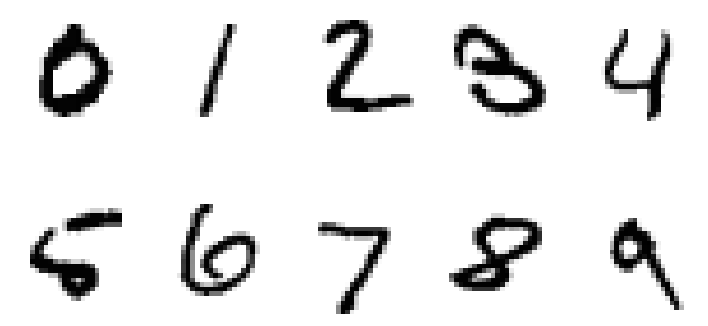

In [3]:
fig, ax = plt.subplots(2,5, figsize=(10,6))
for i in range(10):
    idx = np.where(y==i)
    idx = idx[0][0]
    plt.subplot(2,5, i + 1)
    plt.imshow(255 - X[idx,:].reshape(28, 28), cmap='gray', interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
fig.tight_layout() 
    
plt.savefig('13.1.1_Examples_from_MNIST_dataset.png')
plt.savefig('13.1.1_Examples_from_MNIST_dataset.pdf')

### Normalise the data

In [4]:
sc = StandardScaler().fit(X)
X_s = sc.transform(X)

# PCA analysis

### Compute the PCA transform using all the images


In [5]:
pca = PCA()
pca.fit(X_s);

### Display the PCA scree plot 

The scree plot shows the eigenvalues $\lambda$ in a decreasing order. The most relevant eigenvectors are on the left and 
the least relevant ones on the right. 

The second panel shows the fraction of the image variance already explained by the first n principal components. 
For instance, the first 50 principal components explain 
about 60% of the information in the dataset, whereas the first 200 account for 90% of it.


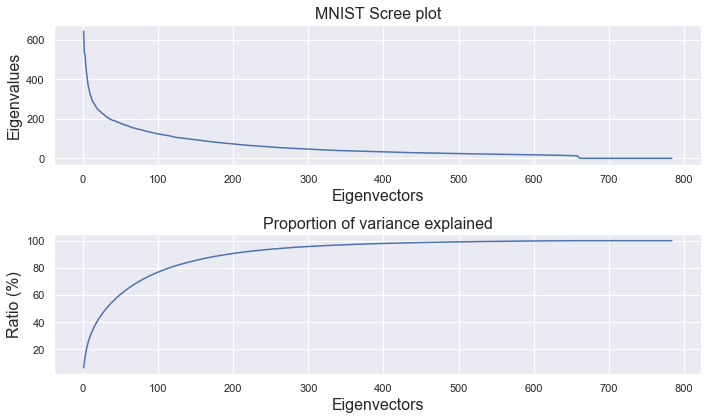

In [6]:
(n,m) = X_s.shape
n_components = np.arange(1,m+1)

fig, ax = plt.subplots(2,1, figsize=(10,6))
ax[0].plot(n_components, pca.singular_values_) 
ax[0].set_xlabel('Eigenvectors', fontsize=16)
ax[0].set_ylabel('Eigenvalues', fontsize=16)
ax[0].set_title('MNIST Scree plot', fontsize=16)

ax[1].plot(n_components, 100*np.cumsum(pca.explained_variance_ratio_)) 
ax[1].set_xlabel('Eigenvectors', fontsize=16)
ax[1].set_ylabel('Ratio (%)', fontsize=16)
ax[1].set_title('Proportion of variance explained', fontsize=16)

fig.tight_layout()  

plt.savefig('13.1.2_MNIST_scree_plot.png')
plt.savefig('13.1.2_MNIST_scree_plot.pdf')

### Show examples of eigenvectors (reshaped as images)

The first eigenvectors (first row) are the most important ones as they contain coherent structures. 
The last eigenvectors (second row) usually contain only noise and are generally discarded.

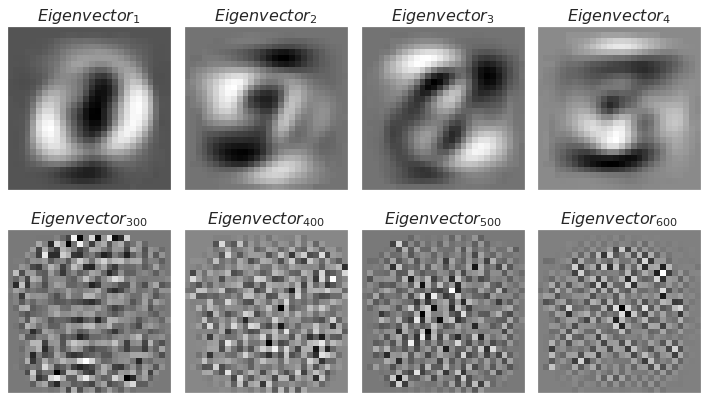

In [7]:
indx = [1, 2, 3, 4, 300, 400, 500, 600]

fig, ax = plt.subplots(2,4, figsize=(10,6))
for i in range(8):
    im = pca.components_[indx[i]-1,:].reshape(28, 28)
    plt.subplot(2,4, i + 1)
    plt.imshow(im, cmap='gray', interpolation='nearest')
    plt.title('$Eigenvector_{%d}$' % (indx[i]), fontsize=16)
    plt.xticks(())
    plt.yticks(())
fig.tight_layout() 
    
plt.savefig('13.1.3_Examples_of_eigenvectors.png')
plt.savefig('13.1.3_Examples_of_eigenvectors.pdf')

# Image similarities

### Project the image data into a 2-D space defined by the first two principal components.

Compute the principal components of the image data and make a plot where each image is represented as a 
point in 2-D PCA space of coordinates ($PCA_{1}$, $PCA_{2}$) or equivalently ($z_{1}$, $z_{2}$). 
Superpose on it the labels for five images in each class.

Notice how the classes are clustered; the '1' images are on the left, the '0' images are on the right, the '7' on the top, etc. 
This is one of the reasons why PCA is so much used in data analysis. 

The classes are not perfectly separated however since there is some visible overlap between them.

In [8]:
Z = pca.transform(X_s)

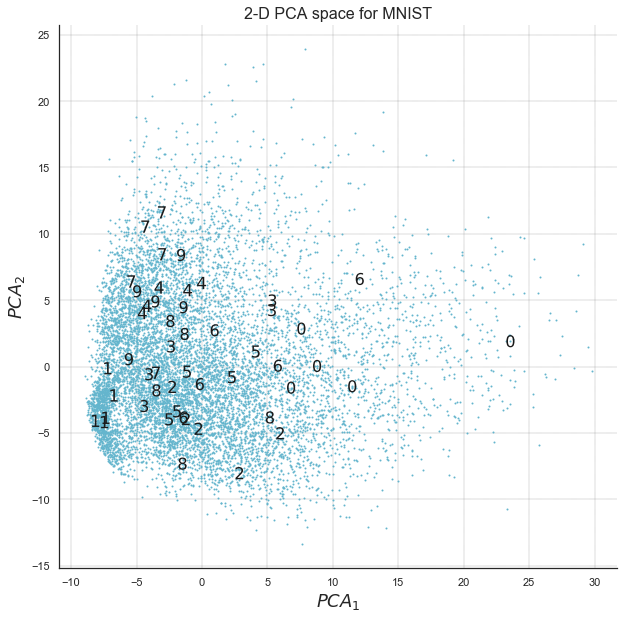

In [9]:
sns.set_style('white')
fig, ax = plt.subplots(figsize = (10, 10))
ax.scatter(Z[:,0],Z[:,1], c = 'c', s=1)
ax.set_xlabel('$PCA_{1}$', fontsize=18)
ax.set_ylabel('$PCA_{2}$', fontsize=18)
ax.set_title('2-D PCA space for MNIST', fontsize=16)

for i in range(10):
    idx = np.where(y==i)
    idx = idx[0][0:5]
    ax.scatter(Z[idx,0], Z[idx,1],c='k', marker=r"$ {} $".format(i), edgecolors='none', s=150 )
    

ax.grid(color='k', linestyle='--', linewidth=.2)
sns.despine()

plt.savefig('13.1.4_2D_PCA_space_for_MNIST.png')
plt.savefig('13.1.4_2D_PCA_space_for_MNIST.pdf')

In the next figure, we replace the label markers with their corresponding images. Different labels overlap because
their handwritten images share similarities. For instance, a curved '7' may look like a '9', a squashed '3' may 
looked like an '8', etc.

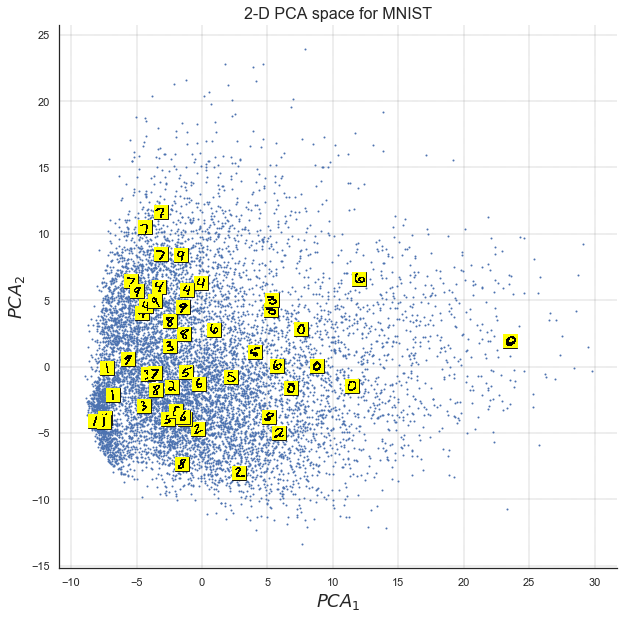

In [10]:
sns.set_style('white')
image_shape = (28, 28)
fig, ax = plt.subplots(figsize = (10, 10))
ax.scatter(Z[:,0],Z[:,1], c = 'b', s=1)
ax.set_xlabel('$PCA_{1}$', fontsize=18)
ax.set_ylabel('$PCA_{2}$', fontsize=18)
ax.set_title('2-D PCA space for MNIST', fontsize=16)

z = np.zeros((28, 28))

for i in range(10):
    idx = np.where(y==i)
    idx = idx[0]
    
    for j in range(5):
        J = 1.-X[idx[j],:].reshape(image_shape)
        I = (np.dstack((J,J,z)) * 255.999) .astype(np.uint8) 
        
        imagebox = OffsetImage(I, zoom=.5);
        ab = AnnotationBbox(imagebox, (Z[idx[j],0], Z[idx[j],1]), frameon=True, pad=0);
        ax.add_artist(ab);

ax.grid(color='k', linestyle='--', linewidth=.2)
sns.despine()

plt.savefig('13.1.5_2D_PCA_space_for_MNIST_with_images.png')
plt.savefig('13.1.5_2D_PCA_space_for_MNIST_with_images.pdf')

# Find the most similar image classes

If images from two different classes look alike, chances are, we will make classification errors when looking at them. The 
example of '1' and '7' images is well known. This is why we often put an horizontal bar in the middle of the '7' to 
make differences between them more visible. Do classifiers make the same errors?

In what follows, we will split the dataset into a training and a test datasets. A K-Nearest-Neighbor 
classifier (KNN) will first be trained on the training dataset. Then, it will be used to make class predictions on the test dataset. 

The confusion matrix between the predicted and the true test labels will help to identify the most 
common errors. This will tell us what are the most lookalike image classes from the classifier standpoint.

### Split the dataset into a training and a test datasets

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_s, y, random_state=0,train_size=0.8)
y_train = y_train.ravel()
y_test = y_test.ravel()


Train a KNN classifier on the training dataset (using 5 neighbors) and use it to classify the test 
dataset. 

Warning: the next cell may take a few seconds to a minute to compute. In a few years from now, this warning will be pointless 
given the increasing speeds of hardware and software!

In [12]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


Compute and display the confusion matrix between the true and the predicted labels for the test dataset. The confusion matrix 
tells us what are the most common classification mistakes. For instance, images of '8' were confused 13 times 
with images of '5'. The most common mistakes were found between (8,5) and (7,9) pairs. Surprisingly, the (1,7) 
pair was not the most prevalent source of confusion.     

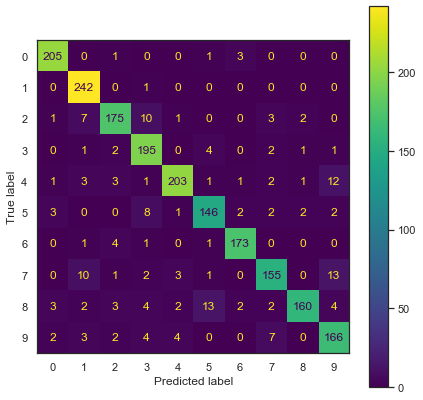

In [13]:
fig, ax = plt.subplots(figsize = (7, 7))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(ax=ax)

fig.savefig('13.1.6_confusion_matrix.png')
fig.savefig('13.1.6_confusion_matrix.pdf')

# Examples of image reconstructions and comparisons

The following section will explain several observations we made about the image class distributions in the 2-D PCA space. 
It is important to mention that the results could have been different if we had trained the KNN classifier with more 
neighbors (5) and more principal components per image (2). 

### A few useful functions

We define functions that will be used to 

<ul>
<li>Show the reconstruction performances with increasing number of principal components </li>
<li>Compare the images reconstructed from the first two components $PCA_{1}$ and $PCA_{2}$ </li>
</ul>

The first function computes PCA approximations of images of labels i and j using the first n principal components.

In [14]:
def PCA_approximations(n_comp, X_s, y, sc, image_shape, i, j):

    # Find one image with label i and one image with label j
    idx = np.where(y==i)
    idx = idx[0][0]
    image_i = X_s[idx,:].reshape(1, -1)
    
    idx = np.where(y==j)
    idx = idx[0][0]
    image_j = X_s[idx,:].reshape(1, -1)

        
    # Compute the PCA transform using only the first n principal components 
    pca = PCA(n_components=n_comp)
    pca.fit(X_s)


    # Transform and reconstruct the image i using the first n principal components 
    Z = pca.transform(image_i)    
    x_i = pca.inverse_transform(Z)

    # Remove the normalisation transform
    x_i = sc.inverse_transform(x_i)
    x_i = x_i.reshape(image_shape)

    
    # Transform and reconstruct the image  using the first n principal components 
    Z = pca.transform(image_j)     
    x_j = pca.inverse_transform(Z)

    # Remove the normalisation transform
    x_j = sc.inverse_transform(x_j)
    x_j = x_j.reshape(image_shape)

    
    # Remove the normalisation transform from the corresponding original images
    X_i = sc.inverse_transform(image_i) 
    X_i = X_i.reshape(image_shape)   
    X_j = sc.inverse_transform(image_j) 
    X_j = X_j.reshape(image_shape)   
        
    return (x_i, x_j, X_i, X_j)

The second function displays a mosaic of the original images with their PCA approximations with 1, 2, 20 
and 200 principal components.

In [15]:
def display_PCA_reconstructions(X_s, y, sc, image_shape, i, j):
    # Number of principal components used for the reconstruction of each image
    ncomp = [1, 2, 20, 200]
    
    fig, ax = plt.subplots(2,len(ncomp)+1, figsize=(10,6))
    for k in range(len(ncomp)):
        # Reconstruct both images with the same number of components
        (x_i, x_j, X_i, X_j) = PCA_approximations(ncomp[k], X_s, y, sc, image_shape, i, j)
        
        plt.subplot(2,5, k+2)
        plt.imshow(255-x_i, cmap='gray', interpolation='nearest')
        plt.title('M = %d' % ncomp[k], fontsize=16)
        plt.xticks(())
        plt.yticks(())
        
        plt.subplot(2,5, k + 7)
        plt.imshow(255-x_j, cmap='gray', interpolation='nearest')
        plt.xticks(())
        plt.yticks(())


    # Original images for reference
    plt.subplot(2,5, 1)
    plt.imshow(255-X_i, cmap='gray', interpolation='nearest')
    plt.title('Original', fontsize=16)
    plt.xticks(())
    plt.yticks(())
    
    plt.subplot(2,5, 6)
    plt.imshow(255-X_j, cmap='gray', interpolation='nearest')
    plt.xticks(())
    plt.yticks(())

    fig.tight_layout() 


## Example I: 7 versus 9

The figure below shows image reconstructions for an increasing number of principal components.
Notice how the reconstructions of '7' and '9' images become easily recognizable when 200 principal components are used. 
This is not too surprising since, as mentionned before, the first 200 components account for 90% of the total image variance.

Notice also how the first two reconstructions (M = 1,2) are very similar for both '7' and '9' images. Hence, they share 
similar values of $z_{1}$ and $z_{2}$. As a result, the '7' and '9' images should be neighbors in the 2-D PCA space 
($z_{1}$, $z_{2}$) or equivalently ($PCA_{1}$, $PCA_{2}$). This is the case; their distributions overlap in the 
top of the 2-D PCA space (see corresponding figures above).  

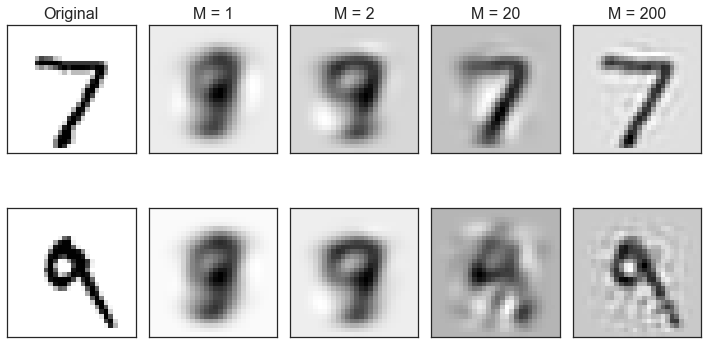

In [16]:
i = 7
j = 9

display_PCA_reconstructions(X_s, y, sc, image_shape, i, j)

plt.savefig('13.1.7_Examples_image_reconstructions_7_and_9.png')
plt.savefig('13.1.7_Examples_image_reconstructions_7_and_9.pdf')

## Example II: 1 versus 7

This new example is counter intuitive. The reconstructions with M = 2 are now quite different; the '1' and '7' images 
do not share similar values of $z_{1}$ and $z_{2}$. As a result, the '1' and '7' images are not close neighbors in 
the 2-D PCA space. The '1' are found on the left of the 2-D PCA space whereas the '7' are found at the top. Their 
distributions barely overlap.


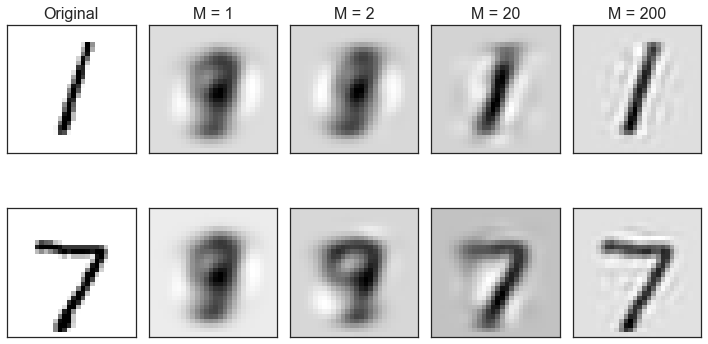

In [17]:
i = 1
j = 7
display_PCA_reconstructions(X_s, y, sc, image_shape, i, j)

plt.savefig('13.1.8_Examples_image_reconstructions_1_and_7.png')
plt.savefig('13.1.8_Examples_image_reconstructions_1_and_7.pdf')